In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import skimage

In [2]:
def show_image(img, bg, newimg, n=3):
    f = plt.figure(figsize=(20,20))
   
    f.add_subplot(1, 3, 1)
    # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('Foreground')

    f.add_subplot(1, 3, 2)
    # bg = cv.cvtColor(bg, cv.COLOR_BGR2RGB)
    plt.imshow(bg)
    plt.title('Background')

    f.add_subplot(1, 3, 3)
    # newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
    plt.imshow(newimg)
    plt.title('Result')

    plt.show(block=True)

In [3]:
img = cv.imread('foreground/fg-1.jpg',1)
bg = cv.imread('background/bg-9.jpg',1)

In [4]:
bg = cv.resize(bg, (img.shape[1], img.shape[0]), fx=0, fy=0, interpolation=cv.INTER_CUBIC)

In [5]:
b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]


In [6]:
mask = (g > 70) & (r < g - 30) & (b < g - 30)


In [7]:
mask[mask == True] = 1
mask[mask == False] = 0

In [8]:
mask = ~mask

In [9]:
plt.imshow(mask, cmap='gray')

In [10]:
newimg = img.copy()
newimg[mask == 0] = bg[mask == 0]

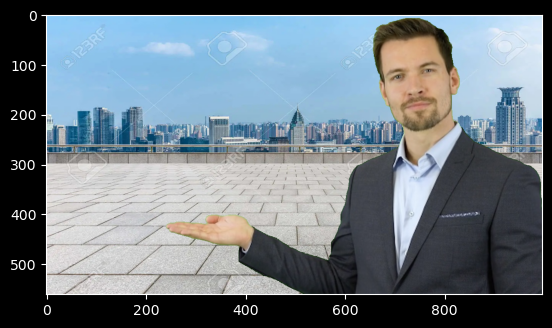

In [11]:
newimg=cv.cvtColor(newimg,cv.COLOR_BGR2RGB)
plt.imshow(newimg)

In [12]:
def removeGreen(fg, bg):

    if fg.shape != bg.shape:
        bg = cv.resize(bg, (fg.shape[1], fg.shape[0]),
                       fx=0, fy=0, interpolation=cv.INTER_CUBIC)
    b, g, r = fg[:, :, 0], fg[:, :, 1], fg[:, :, 2]

    mask = (g > 70) & (r < g - 30) & (b < g - 30)
    mask = ~mask

    # mask = skimage.morphology.binary_closing(mask, footprint=np.ones((3, 3)))
    # mask = skimage.morphology.binary_closing(mask, footprint=np.ones((4, 3)))

    fg[mask == False] = bg[mask == False]

    return fg


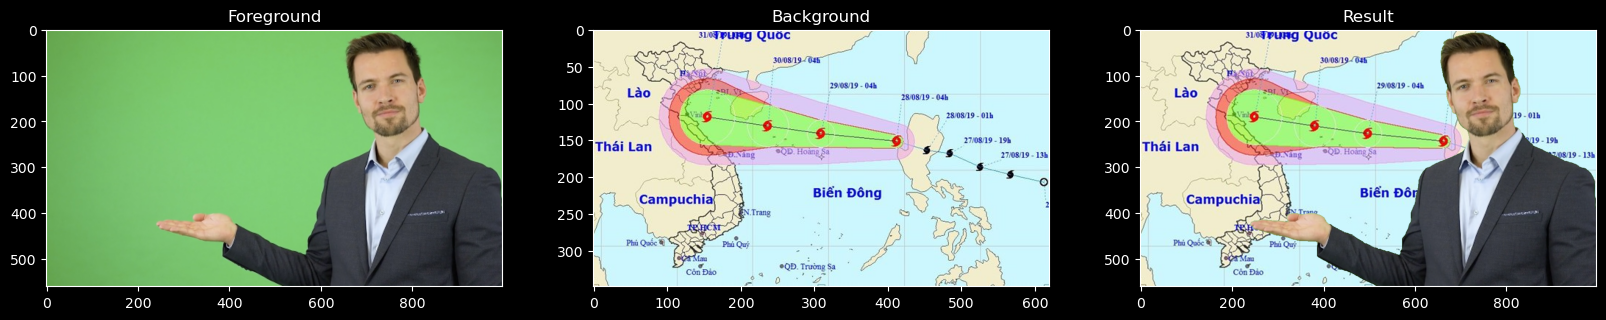

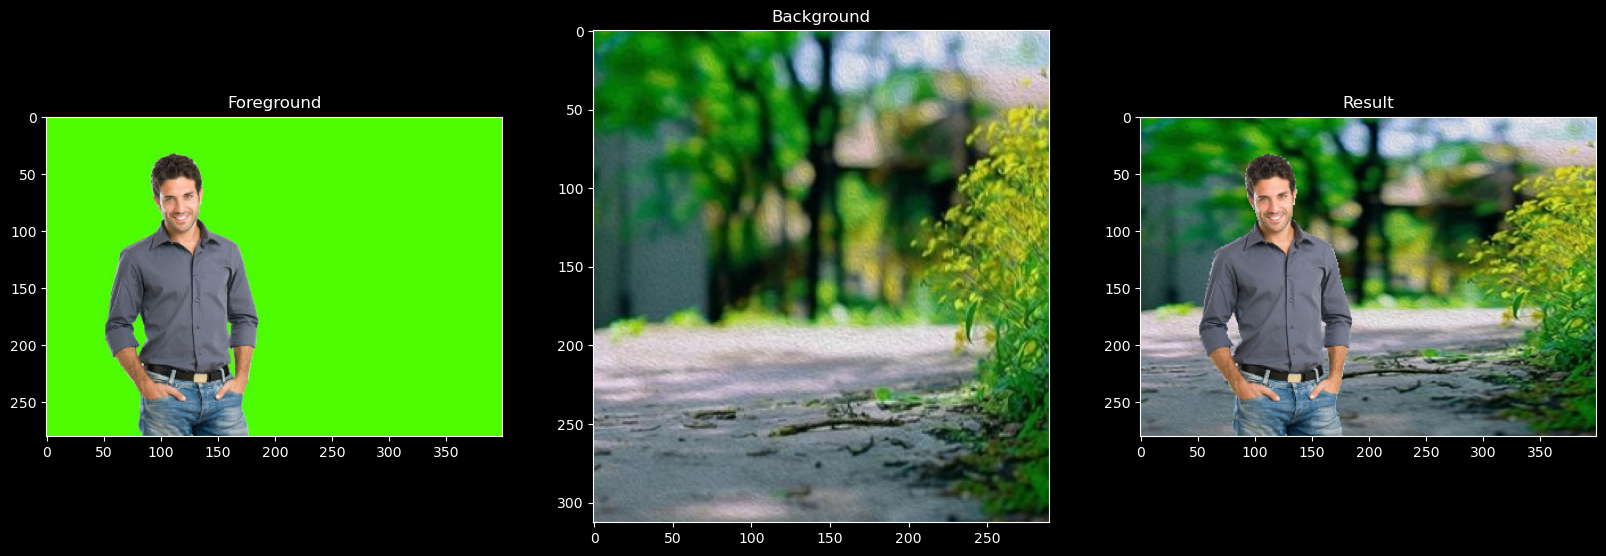

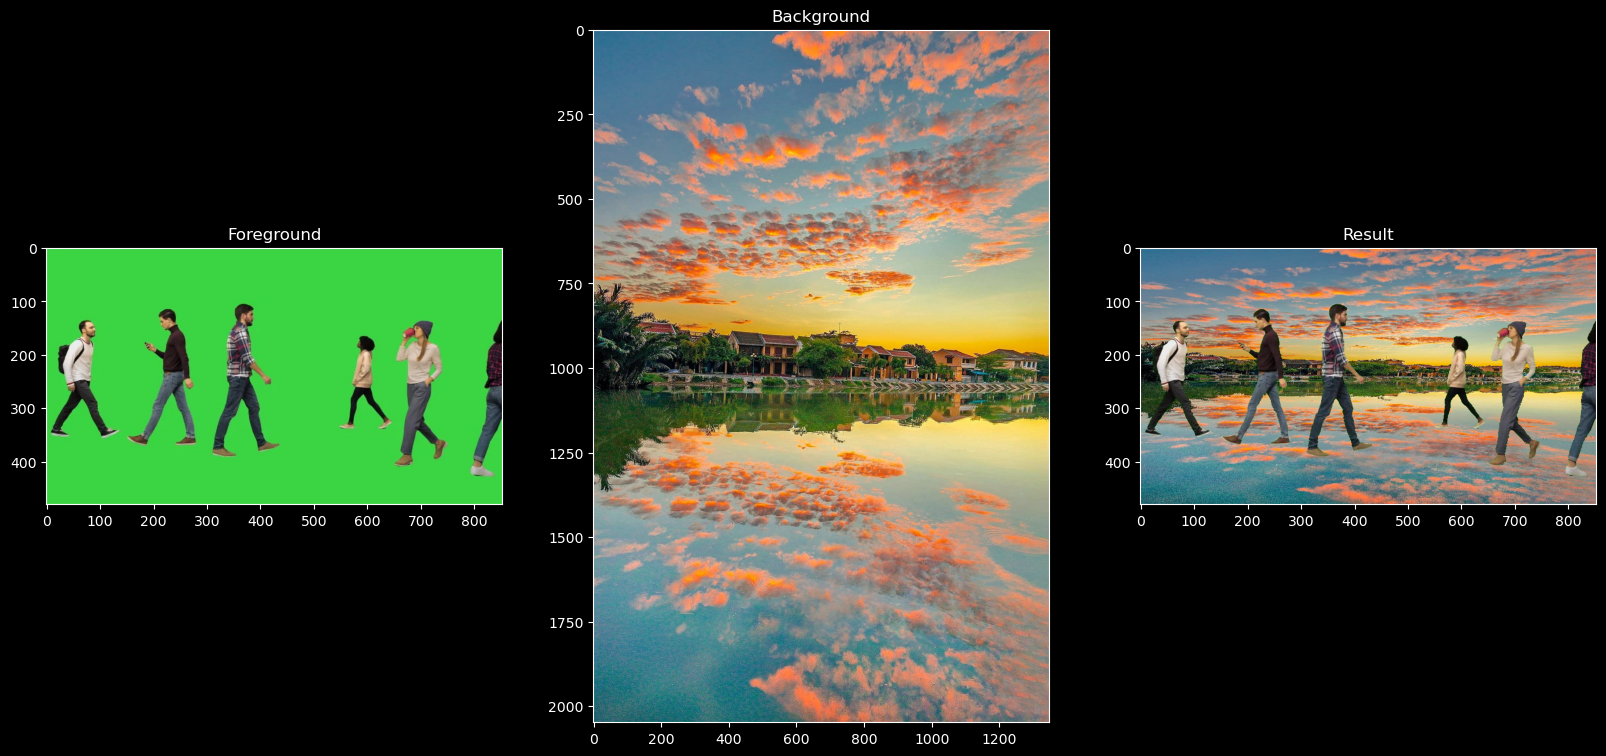

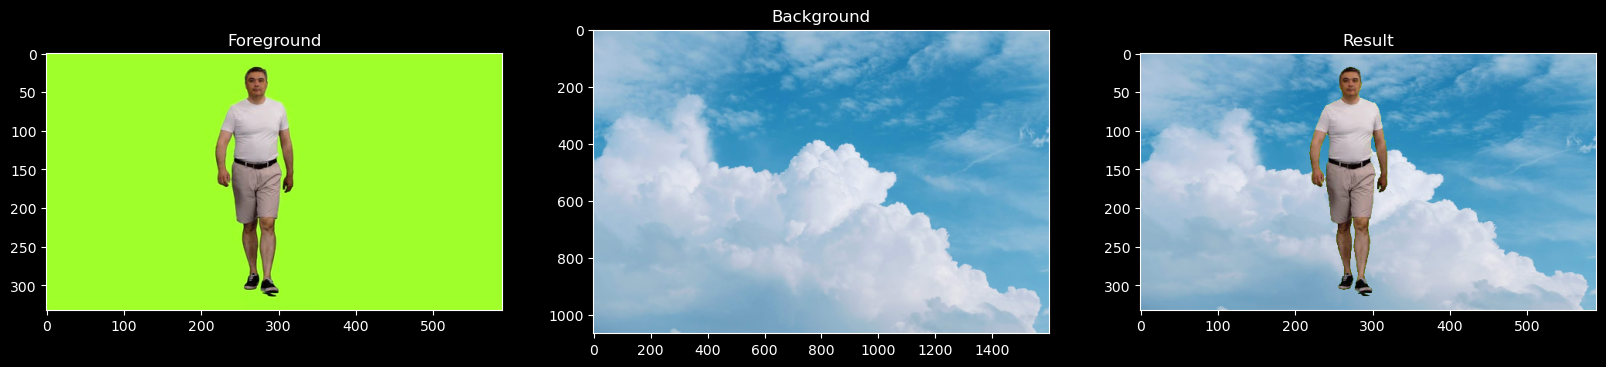

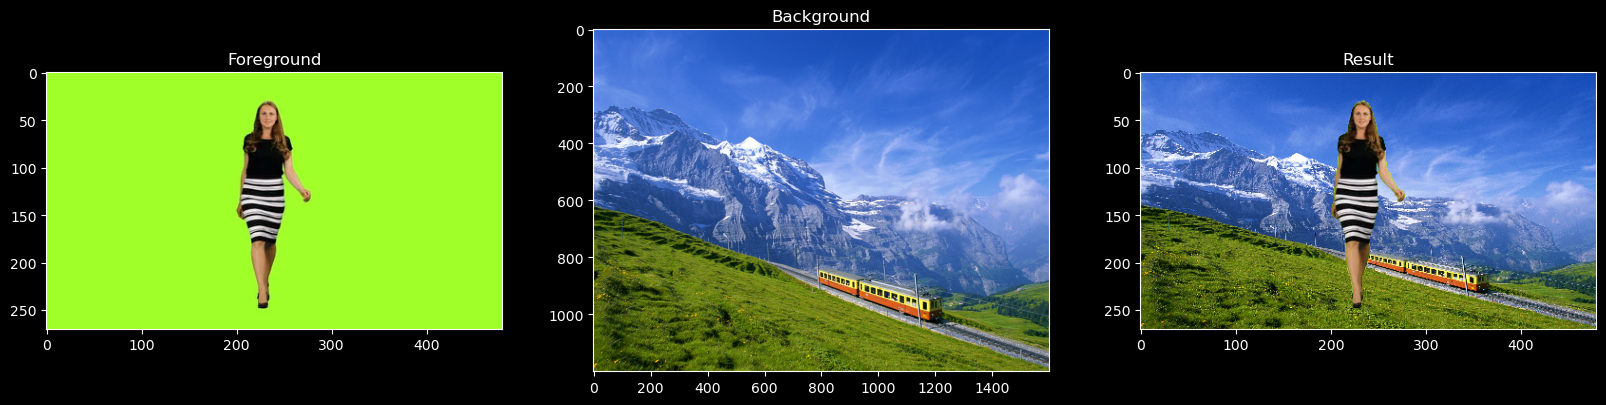

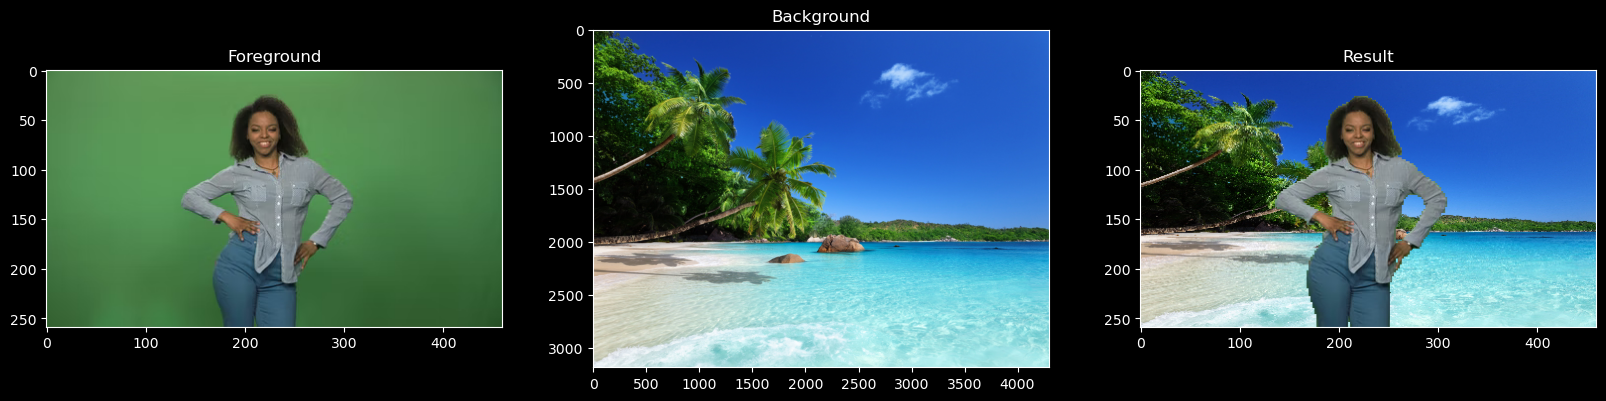

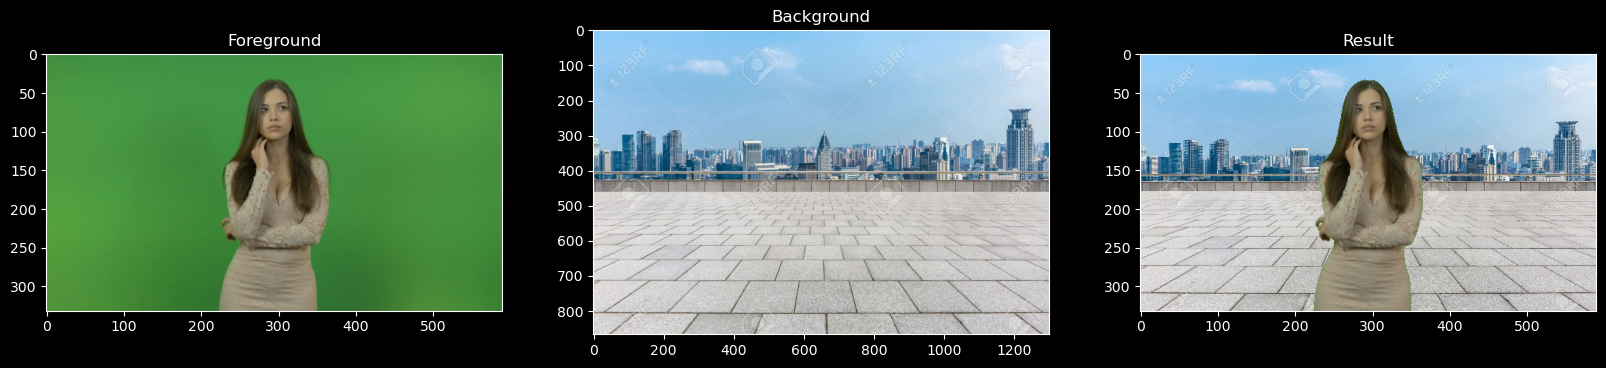

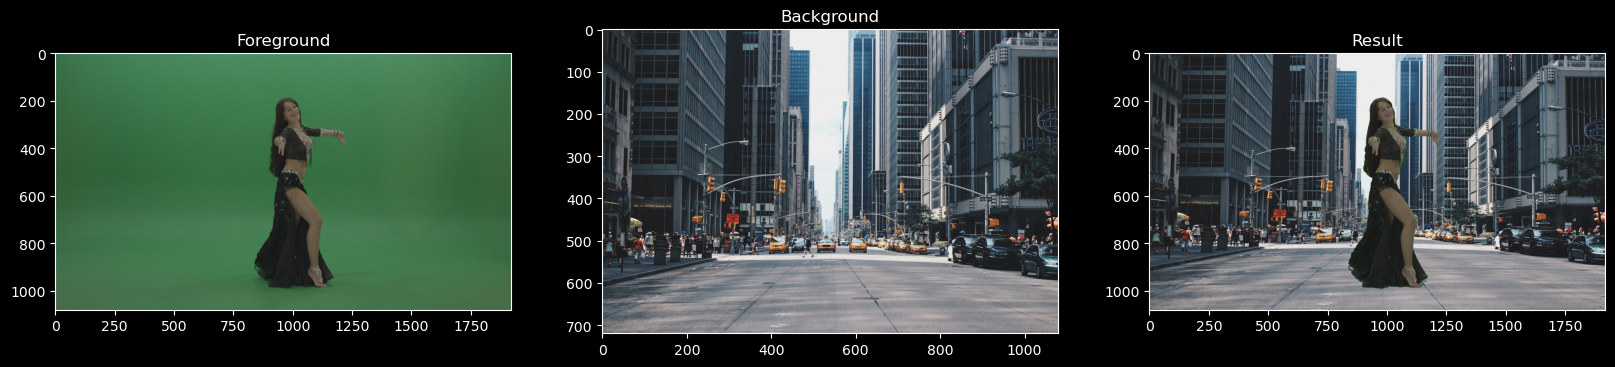

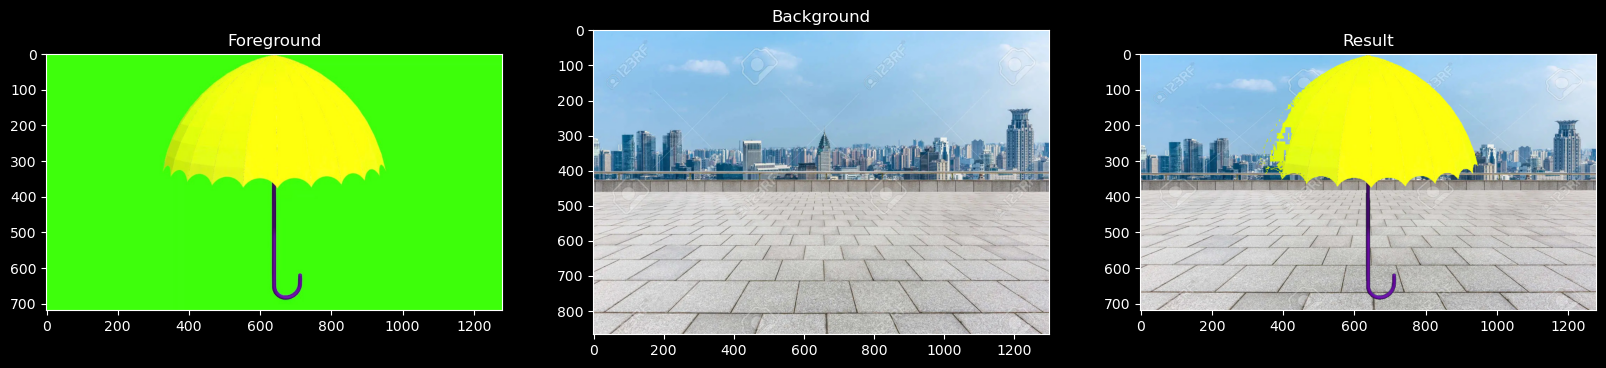

In [13]:
path_fg_folder = './foreground/'
path_bg_folder = './background/'
for i in range(1,10):
    fg_path = path_fg_folder + 'fg-' + str(i) + '.jpg'
    bg_path = path_bg_folder + 'bg-' + str(i) + '.jpg'
    fg = cv.imread(fg_path,1)
    bg = cv.imread(bg_path,1)
    newImg = removeGreen(fg.copy(),bg)
    fg = cv.cvtColor(fg,cv.COLOR_BGR2RGB)
    bg = cv.cvtColor(bg,cv.COLOR_BGR2RGB)
    newImg= cv.cvtColor(newImg,cv.COLOR_BGR2RGB)
    show_image(fg,bg,newImg)